In [4]:
# loading the scrapper & analysis functions
from comment_crawler import *
from comment_crawler_analysis import *
from graphs_and_charts import *
from authors_names import *

In [5]:
%run comment_crawler.py
%run comment_crawler_analysis.py
%run graphs_and_charts.py
%run authors_names.py

#### Define the starting urls list:

In [6]:
starting_urls_list

['https://mymadison.io/documents/city-of-buffalo-open-data-policy',
 'https://mymadison.io/documents/durham-open-data-policy',
 'https://mymadison.io/documents/city-of-tyler-data-policy',
 'https://mymadison.io/documents/city-of-glendale-draft-open-data-resolution',
 'https://mymadison.io/documents/metro-nashville-government-open-data-policy',
 'https://mymadison.io/documents/city-of-syracuse-open-data-policy',
 'https://mymadison.io/documents/napervilleopendatapolicy',
 'https://mymadison.io/documents/bart-open-data-policy',
 'https://mymadison.io/documents/san-francisco-open-data-legislation-2014']

### Scrapping all the open data policy comments and policy texts for all Madison websites and putting them into dataframes

In [7]:
all_madison_dfs, all_cities_dataframe, full_policy_text = go_all_madison_websites(starting_urls_list);

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/summerfellow/anaconda/envs/py35/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [11]:
print ("Names of cities under analysis:")
print()
for name, city, policy, support in all_madison_dfs:
    print(name)

Names of cities under analysis:

Buffalo
Durham
Tyler
Glendale
Nashville
Syracuse
Naperville
Bart
San Francisco


# --- Analysis ----

# 1.1) Most frequent words

## a) most common words in quoted texts (policy sections)

### (top 20 words) for all the cities combined


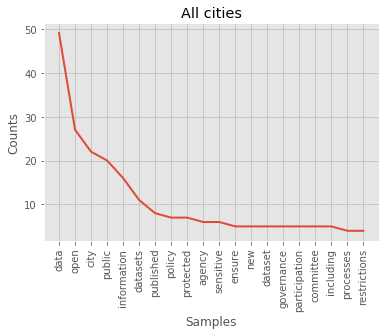

,word,quoted_text_freq
0,data,49
1,open,27
2,city,22
3,public,20
4,information,16


In [12]:
common_words_quoted_texts("quoted_text", "All cities", all_cities_dataframe, 20, "both").head()

## b) most common words in actual comments

### (top 20 words) for all the cities combined


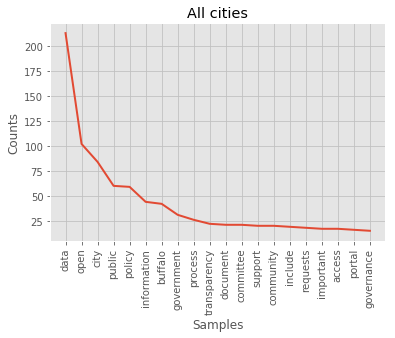

,word,comment_text_freq
0,data,213
1,open,102
2,city,84
3,public,60
4,policy,59


In [13]:
common_words_quoted_texts("comment_text", "All cities", all_cities_dataframe, 20, "both").head()

 There is a lot of noise just by counting the word frequency. For instance, words that are *expected* to occur frequently such as "data" and "open" don't add much to our understanding of which policy sections residents quote the least or most often.

# 1.2) compare quoted-text frequency with the policy-text frequency

### for all cities

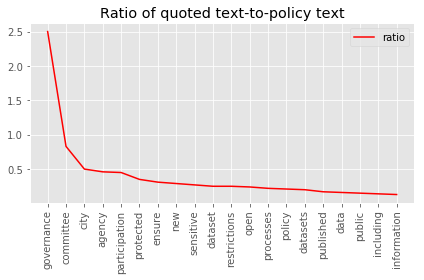

,word,policy_text_freq,quoted_text_freq,ratio
0,governance,2,5,2.50
1,committee,6,5,0.83
2,city,44,22,0.50
3,agency,13,6,0.46
4,participation,11,5,0.45
5,protected,20,7,0.35
6,ensure,16,5,0.31
7,new,17,5,0.29
8,sensitive,22,6,0.27
9,dataset,20,5,0.25


In [20]:
ratio_quoted_freq_with_policy_freq("single_line_graph", "quoted_text", "Ratio of quoted text-to-policy text", all_cities_dataframe, 20, full_policy_text, "single", "descending")

Words like "governance", "committee", "protected", "sensitive" and so on are quoted more often relative to the number of times they are mentioned in the policy. This shows that people are talking and engaging more closely with topics on *governance*, *privacy* and *utility*.

# 1.3) compare commented-word frequency with in-the-whole-policy word frequency

### for all cities

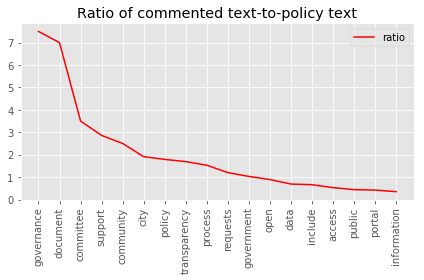

,word,policy_text_freq,comment_text_freq,ratio
0,governance,2,15,7.50
1,document,3,21,7.00
2,committee,6,21,3.50
3,support,7,20,2.86
4,community,8,20,2.50
5,city,44,84,1.91
6,policy,33,59,1.79
7,transparency,13,22,1.69
8,process,17,26,1.53
9,requests,15,18,1.20


In [19]:
ratio_quoted_freq_with_policy_freq("single_line_graph", "comment_text", "Ratio of commented text-to-policy text", all_cities_dataframe, 20, full_policy_text, "single", "descending")

# 2) Sentiment Analysis

## a) sentiment analysis graphs for each city for comments of most commonly quoted policy sections

In [106]:
# ???
#sentimental_analysis_graphs_1 = top_policy_sections_commented(all_madison_dfs, "most_common_policy", 3)

## b) sentiment analysis graphs for each city for all comments

positive sentence: I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.
positive sentence: I would be interested to see this more finely documented. It would be great to have a living, breathering process that community members could submit data sets that they have created (required to meet the data standards set forth by the Open 

positive sentence: It is important to include all members of the local community that can benefit from this information; including nonprofits and foundations.
positive sentence: Thank you to the City of Buffalo!  My comments are regarding the geospatial (GIS) data. We often build tools for local government, and open data portals are our go-to standard to accessing data.  Please also consider including open access to live data such as webservices. Downloadable data, such as xmls, shapefiles or even file geodatabases are necessary for local processing and analysis.  However, most of our support to local government agencies is by functioning as tool and system developers. It makes us incredibly more productive (and accurate) to have access to live data.  I agree with Sean Meyers and support the distribution of the webservices and mapservices in web standard formats.  -Karyn Tareen CEO, Geocove
positive sentence: I'm glad this issue came to the forefront for the city, as these have been gr

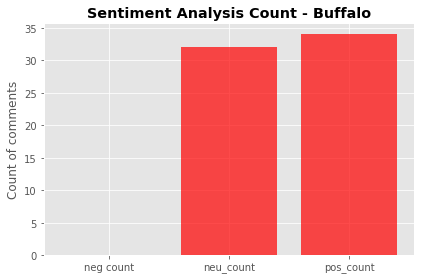

None
positive sentence: From a quick read-through, this seems really good and seems to hit most major points that come to mind for me.  The only possible improvements that occur to me right now are:

Good metadata is very important but also difficult/costly (in a general sense, not necessarily dollars).  You may want to lay out what your approaches will be.


It may be implied but an explicit "open by default" policy can be very powerful.  What I mean by this is basically that anything not restricted from release is eligible for release.  This is, of course, not a commitment to release any particular dataset on any particular schedule since everyone has resource constraints but basically means it goes into whatever prioritization process (either formal or informal) you use, with an intention to publish if/when it rises to the top.



total_comments: 1 --- city name: Durham


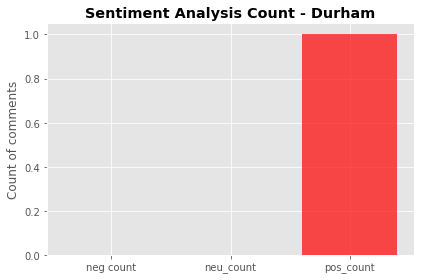

None
positive sentence: I don't see any explanation of how this will affect FOIA requests. What is the timeline of dispute and who makes that decision when a request is not going to be granted under this policy?
With many of our requests, we need the information as soon as possible. If the data coordinator deems an item sensitive, what is the timeline for their response? 24 hours, 48 hours, a week?
I applaud the desire for more openness, but without a defined FOIA escalation policy, it could end up being another hurdle.
positive sentence: Are the goals of the data project those listed in Section 11? You might want to consider identifying them as such so it is clear that the "initiatives"  are the "goals". If the goals are different, you may want to consider including them in this document.

total_comments: 4 --- city name: Tyler


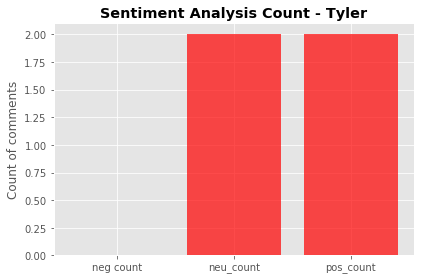

None
positive sentence: Special thanks to everyone who took the time to provide feedback and comments on the draft resolution.  Your feedback was valuable to the process.  I am pleased to report that the City Council adopted a resolution in support of creating an Open Data program on Tuesday 6/27.  The final resolution language can be found here:  https://glendale-az.legistar.com/LegislationDetail.aspx?ID=3086887&GUID=68D243FB-66A3-4381-B963-2176AC97CEE9.  Special thanks to the What Works Cities and Sunlight Foundation teams for helping us make improvements for our community.  We are looking forward to the implementation phase of this project.
positive sentence: This resource would be of great value to the Human Resources Commission.  The demographic information would help serve as a guide to commission activities.  Kudos for the concept.
positive sentence: I have read the comments from others that have posted here and not to be redundant, I agree that there should be transparency and 

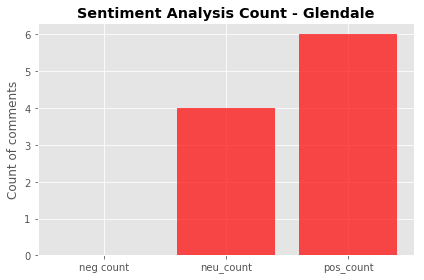

None
positive sentence: Section IX, item 4:
Given the requirement to provide credit or attribution, this section is unclear on the acceptable forms of attribution and to whom the attribution applies.For example, would a user of the Street Sweeping Schedule dataset (https://data.nashville.gov/Beautification/Metro-Water-Services-Current-Street-Sweeping-Sched/p9iq-sxk3) should attribution marks/text say "Metro Water Services" or "Metro Government"?Possible Solution: Change Section IX, Item 4 to say: "Metropolitan Government requests that when content, data, documentation, code, and related materials from https://data.nashville.gov is used, proper credit or attribution be given to the originating Department or 'Metropolitan Government of Nashville and Davidson County', whichever is the most specific and accurate."Moreover, it'll probably be a good idea to say that use of the 'Metropolitan Government of Nashville and Davidson County' seal is not an acceptable form of attribution.
positive s

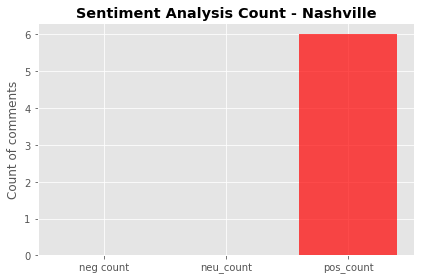

None
positive sentence: Announcements of data set publication when they are released would also encourage participation
positive sentence: You probably want to (a) limit this to "records created by third party agency contractors" and not "records of third party...." Also, does this policy dispositively void all contract provisions what explicitly transfer ownership of records to a third party? Is that even possible from a "policy" and not a law? And if not, then is the enforcement aspect that you are directing agencies to include explicit provisions in their contracts. Is, e.g., the GC going to create model contract provisions?
positive sentence: I don't understand what would make a dataset "effective." Data is just data. Some data is more useful than other data. Is the implication that you want to prioritize more interesting data, e.g., bus routes or tax parcel data, that may have more immediate commercial or civic application?
positive sentence: "Permanence" is a strong guarantee a p

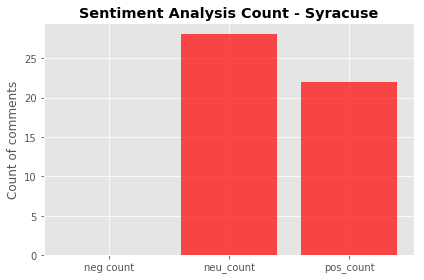

None
positive sentence: Datasets should also be analyzed and improved to be customer friendly.
positive sentence: I really like this.  The one overall suggestion I would make is to strengthen the protections of transparency.  (By the way, putting this document out for public review and comment is a great start.)  Unlike such goals as economic development, collaboration with the private sector, and so on, transparency has a built-in danger because it sometimes calls for those with power to act against their own interests.  There will be things that people would rather not make public and they can always come up with legitimate reasons to withhold the information so you want institutional safeguards.  It is a tough problem but some ideas to consider are:Again, all of this is really tough and if you achieve even some of it, especially at first, you will be doing well.Good luck!
positive sentence: Excellent!  And you're off to a smashing start with Madison here. Would be great to have this

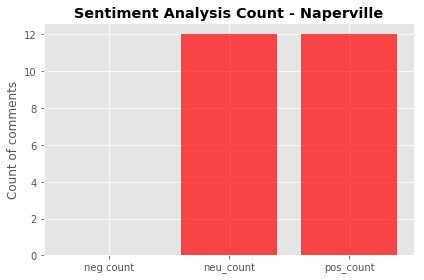

None
positive sentence: From an open data expert:
"If you haven't already, please take a look at M-13-13, the formal Open Data Policy for the Federal Government (https://www.whitehouse.gov/sites/default/files/omb/memoranda/2013/m-13-13.pdf)Is there any particular reason you limited your definition of "data" so strictly for BART? I'd advocate for a broader definition so that you can't be hemmed in later by opposition. Data, at its most basic level, is simply information that is structured in some human or machine-readable format. Also, this definition really doesn't apply to source code (some of which is covered under open source licenses with their own legal restrictions), which you reference later.In an opposite manner, I believe your definition of "open data" is too broad. Open data, if not properly documented and managed, can lead to useless files hanging out there on the Internet without being "discoverable" or "searchable". I'd definitely look to M-13-13 for at least a few example

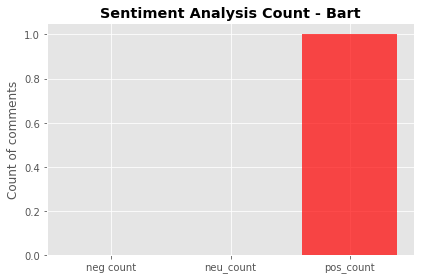

None

total_comments: 2 --- city name: San Francisco


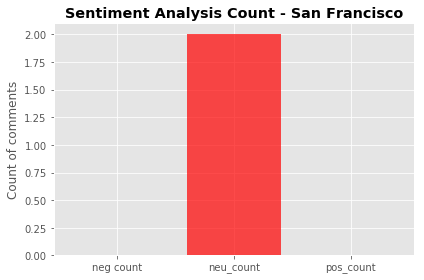

None


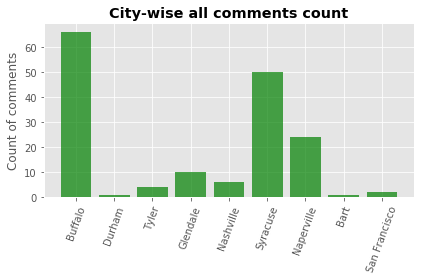

None


In [72]:
sentimental_analysis_graphs_2 = top_policy_sections_commented(all_madison_dfs, "all_common_comments", 3)

## c) sentiment analysis graphs for all the cities (aggregate) for most commonly quoted policy sections

In [107]:
# ???
#sentimental_analysis_graphs_3 = top_policy_sections_commented(all_cities_dataframe, "most_common_policy", 4)

## d) sentiment analysis for all the cities (aggregate) for all comments

positive sentence: I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.

positive sentence: I would be interested to see this more finely documented. It would be great to have a living, breathering process that community members could submit data sets that they have created (required to meet the data standards set forth by the Open

neutral sentence: Does this position currently exist in City Hall? If not, who would take on this role?

neutral sentence: It may be useful to have a participatory aspect that prioritizes data updates/releases based on demand (e.g. a certain number of requests triggers an update/response).

neutral sentence: Perhaps a section of the central repository should host all the data that was released in response to FOIL requests. It would provide wider access to this data and could serve as a means to solicit public feedback on the relative priority of establishing a more formal release of the dataset (with relevant metadata and scheduled refreshes of the data).

neutral sentence: Metadata is the key to making sure that the data is used correctly and enables the data to be used in as many different (yet appropriate) ways possible.

positive sentence: I support the effort to make data accessible to the public. The NYC Open Data portal is a good example of an existing resource with a similar in

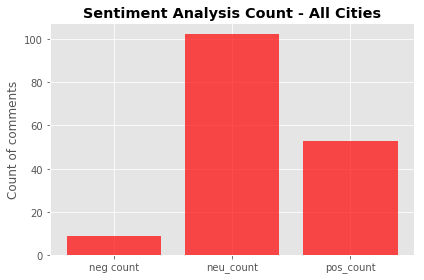

In [206]:
sentimental_analysis_graphs_4 = top_policy_sections_commented(all_cities_dataframe, "all_common_comments", 3)

# 3) Analyzing the most popular policy sections

In [112]:
popular_sections = sentimental_analysis_graphs_3[3]
filtered_pop_sections = pd.DataFrame()

for phrase, count in popular_sections:
    filtered_pop_sections = filtered_pop_sections.append(all_cities_dataframe[all_cities_dataframe['quoted_text'].astype(str).str.contains(phrase)])

filtered_pop_sections_4 = filtered_pop_sections.reset_index()

In [113]:
popular_sections #popular sections phrases, number of times they are quoted

[('Open Data Governance Committee', 5),
 ('protected and sensitive information', 4),
 ('and implement a process', 3),
 ('implement a process for', 3),
 ('the Open Data Governance', 3),
 ('the city ’ s', 3),
 ('and sensitive information ;', 3),
 ('Develop and implement a', 3),
 ('on the disclosure of', 2),
 ('quantitative , or qualitative', 2)]

In [114]:
filtered_pop_sections_4 = filtered_pop_sections_4.drop_duplicates("comment_text")

In [80]:
for index, row in filtered_pop_sections_4.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: Open Data Governance Committee
Comment text: Minutes from any and all meetings of this committee should be made available in machine-readable formats in an easily-accessible location (including within the open data system)
Number of likes: 1

City: Buffalo
Partial quoted text: Open Data Governance Committee
Comment text: How will this committee be formed?  Will it be comprised of community stakeholders or only government employees/officials?
Number of likes: 0

City: Buffalo
Partial quoted text: periodically update the data based on internal and external needs; serve on the Open Data Governance Committee; upon request, meet with the Open Data Governance Committee to discuss any matter pertaining to implementation of this Order; and assist in the preparation of the annual open data compliance report.
Comment text: Would this liaison be the contact person if a dataset user (ie a student doing a project or a researcher) had questions about the set?
Numbe

In [125]:
# hand-made (this needs eye-balling)
main_policies = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", 'Open Data Access']
count_pop_policies = [3, 2, 3, 3, 1, 0]

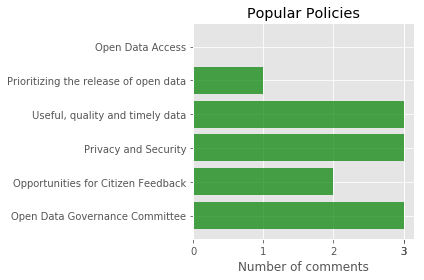

In [177]:
horizontal_bar(main_policies, count_pop_policies, "Number of comments", "Popular Policies")

### 3-word long quoted policy text

positive sentence: That would be super helpful :)

positive sentence: Maybe you should utilize a deliberative democratic process (like participatory budgeting, only without a budget as the end goal and maybe a bit briefer) to encourage public engagement?

neutral sentence: This is really important, but I would be interested to see practically how these can be measured against departmental goals and targets, etc.

positive sentence: Excellent!  And you're off to a smashing start with Madison here. Would be great to have this be the living document and location for regular feedback loops between the public and the Naperville, IL city government.

neutral sentence: The open data system should include a space for showcasing the innovative ways in which city data are used by these various stakeholders.

neutral sentence: Data - Statistical, factual, quantitative, textual, narrative or qualitative information that is regularly maintained or created by or on behalf of the City.

neutral sente

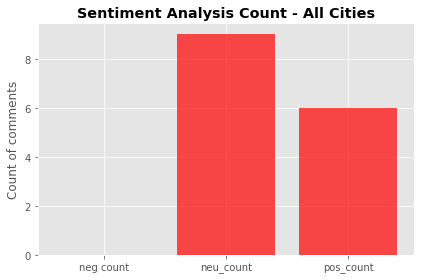

In [181]:
sentimental_analysis_graphs_5 = top_policy_sections_commented(all_cities_dataframe, "most_common_policy", 3)

In [182]:
popular_sections_3 = sentimental_analysis_graphs_5[3]
filtered_pop_sections_3 = pd.DataFrame()

for phrase, count in popular_sections_3:
    filtered_pop_sections_3 = filtered_pop_sections_3.append(all_cities_dataframe[all_cities_dataframe['quoted_text'].astype(str).str.contains(phrase)])

filtered_pop_sections_3 = filtered_pop_sections_3.reset_index()

In [183]:
popular_sections_3 #popular sections phrases, number of times they are quoted

[('the Open Data', 6),
 ('Open Data Governance', 5),
 ('Data Governance Committee', 5),
 ('of the City', 4),
 ('protected and sensitive', 4),
 ('and sensitive information', 4),
 ('on behalf of', 4),
 ('Develop and implement', 3),
 ('from the public', 3),
 ('open license basis', 3)]

In [184]:
filtered_pop_sections_3 = filtered_pop_sections_3.drop_duplicates("comment_text")

In [185]:
for index, row in filtered_pop_sections_3.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: Provide for a future means of digitizing archived material that was in existence prior to the development of the Open Data Program;
Comment text: That would be super helpful :)

City: Buffalo
Partial quoted text: periodically update the data based on internal and external needs; serve on the Open Data Governance Committee; upon request, meet with the Open Data Governance Committee to discuss any matter pertaining to implementation of this Order; and assist in the preparation of the annual open data compliance report.
Comment text: Would this liaison be the contact person if a dataset user (ie a student doing a project or a researcher) had questions about the set?

City: Buffalo
Partial quoted text: Develop and implement a process for prioritizing the release of datasets to the Open Data Portal which takes into account new and existing signals of interest from the public (such as the frequency of FOIL requests), the City's programmatic priorities, exis

In [188]:
# hand-made (this needs eye-balling)
main_policies_3 = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", 'Open Data Access']
count_pop_policies_3 = [6, 2, 5, 5, 2, 0]

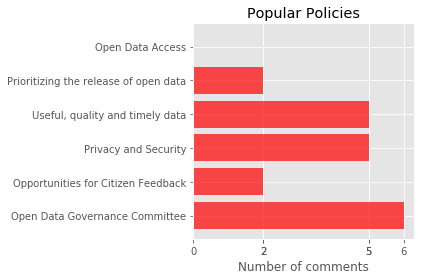

In [195]:
horizontal_bar(main_policies_3, count_pop_policies_3, "Number of comments", "Popular Policies")

# 4) Analyzing positive and negative sentiments

In [207]:
neg_count = sentimental_analysis_graphs_4[0][1]
neu_count = sentimental_analysis_graphs_4[0][3]
pos_count = sentimental_analysis_graphs_4[0][5]

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	upper center
	center right
	center
	upper left
	upper right
	lower right
	right
	lower center
	best
	center left
	lower left

  six.iterkeys(self.codes))))


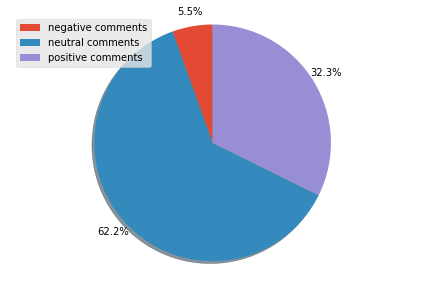

In [208]:
labels = ['negative comments', 'neutral comments', 'positive comments']
sizes = [neg_count, neu_count, pos_count]

pie_chart(sizes, labels, 'sentiment-analysis-pie-chart')

### a) Positive comments

In [209]:
pos_comments = sentimental_analysis_graphs_4[2]

In [210]:
pos_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(pos_comments)].reset_index()

In [211]:
pos_comments_dict.head(3)

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name,Position,Company_name,Category_work
0,1,E4-XFnl1uKc,Aaron Lee,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],0,Buffalo,Software Developer,Solace Systems,Private
1,2,E4-XFnjG3Ac,Aaron Lee,2017-01-25 04:25:20,0,public participation by providing regular oppo...,I would be interested to see this more finely ...,<p>I would be interested to see this more fine...,[],0,Buffalo,Software Developer,Solace Systems,Private
2,3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],0,Buffalo,Researcher,Freelance,Academia (private)


In [216]:
# hard-coded - (needs eye-balling)

pos_main_policies = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", "Open Data Access"]
count_pos_policies = [2,5,1,8,4,4]
# release of historical data, how can other people host datasets on their platform, budget for data literacy, keep the document a living document so there are feedback loops

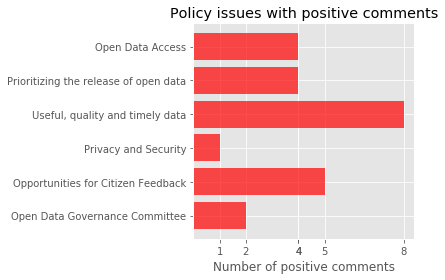

In [217]:
horizontal_bar(pos_main_policies, count_pos_policies, "Number of positive comments", "Policy issues with positive comments")

In [218]:
for index, row in pos_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print('\033[1m' + "Number of likes:", row['num_likes'])
    print('\033[1m' + "Count of replies:", row['reply_ids_count'])
    print()

City: Buffalo
Partial quoted text: None
Comment text: I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.
Number of likes: 2
Count of replies: 0

City: Buffalo
Partial quoted text: public participation by providing regular opportunities for feedback and collaboration
Comment text: I would be interested to see this more finely docu

Number of likes: 0
Count of replies: 1

City: Naperville
Partial quoted text: None
Comment text: Great idea. I would like to see how data is classified into private and public.
Number of likes: 3
Count of replies: 2

City: Bart
Partial quoted text: None
Comment text: From an open data expert:
"If you haven't already, please take a look at M-13-13, the formal Open Data Policy for the Federal Government (https://www.whitehouse.gov/sites/default/files/omb/memoranda/2013/m-13-13.pdf)Is there any particular reason you limited your definition of "data" so strictly for BART? I'd advocate for a broader definition so that you can't be hemmed in later by opposition. Data, at its most basic level, is simply information that is structured in some human or machine-readable format. Also, this definition really doesn't apply to source code (some of which is covered under open source licenses with their own legal restrictions), which you reference later.In an opposite manner, I believe your definition

### b) Negative Comments

In [219]:
neg_comments = sentimental_analysis_graphs_4[1]

In [220]:
neg_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(neg_comments)]

In [221]:
neg_comments_dict.head(2)

,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name,Position,Company_name,Category_work
46,E4-XFfET0X4,Andrew Nicklin,2017-01-17 03:03:41,0,policy concerns,risks to the public,<p>risks to the public</p>,[E4-XFfIhTHE],1,Buffalo,"Technology, Data, and Open Government Strategist",GovEx,Academia (private)
51,E4-XFepJkRo,Andrew Nicklin,2017-01-17 02:49:03,0,no legal encumbrances on use or reuse,If limiting the City's liability for how the d...,<p>If limiting the City's liability for how th...,[E4-XFinM1no],1,Buffalo,"Technology, Data, and Open Government Strategist",GovEx,Academia (private)


In [222]:
for index, row in neg_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: policy concerns
Comment text: risks to the public

City: Buffalo
Partial quoted text: no legal encumbrances on use or reuse
Comment text: If limiting the City's liability for how the data is used is considered a legal encumbrance then this phrase should be removed or modified. It's also conceivable you want Terms & Conditions on your open data which prohibit the use of data when committing a crime, etc.

City: Buffalo
Partial quoted text: Ensure that access to restricted data is blocked,
Comment text: There should be a publicly available list of what is blocked and why. Having this list facilitates transparency and understanding of how the government operates.

City: Glendale
Partial quoted text: None
Comment text: This is way past due. The current system is awful and discourages citizen evolvement.
Please continue on with this vital upgrade.

City: Syracuse
Partial quoted text: open formats
Comment text: "Open formats" wasn't defined above. I assume 

In [223]:
# hard-coded (needs eye-balling)

neg_main_policies = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", "Open Data Access"]
count_neg_policies = []

In [224]:
horizontal_bar(neg_main_policies, count_neg_policies, "Number of negative comments", "Policy issues with negative comments")

ValueError: incompatible sizes: argument 'width' must be length 6 or scalar

# 5) likes and replies analysis (popular comments extended)

### a) analysis of comments *2 likes or more*

In [156]:
high_likes_comments = likes_replies_analysis("2", 'num_likes', all_cities_dataframe)


comment:

I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.

comment:

I strongly support the proposed policy, with a recognition of the outstanding contributions that have already been made by other residents, citizens, and interested parties.Many thanks to the City of Buffalo for leading this effort. Most of my comments are w

In [157]:
high_likes_comments.head()

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name,Position,Company_name,Category_work
0,1,E4-XFnl1uKc,Aaron Lee,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],0,Buffalo,Software Developer,Solace Systems,Private
1,3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],0,Buffalo,Researcher,Freelance,Academia (private)
2,13,E4-XFl5JXZo,Robert Galbraith,2017-01-24 20:30:42,2,None,The following comment is submitted on behalf o...,<p>The following comment is submitted on behal...,[E4-XFmHvN6E],1,Buffalo,Unknown,Unknown,Unknown
3,17,E4-XFksGPRs,Curtis Robbins,2017-01-24 18:01:32,2,"residents, government leaders, businesses, res...","residents, government leaders, businesses, non...","<p>residents, government leaders, businesses, ...","[E4-XFkw6sfw, E4-XFk-iSC4]",2,Buffalo,Unknown,Unknown,Unknown
4,21,E4-XFj2bu7o,Karyn Tareen,2017-01-24 14:55:16,4,None,Thank you to the City of Buffalo! My comments...,<p>Thank you to the City of Buffalo! My comme...,[],0,Buffalo,President & CEO,Geocove,Private


In [145]:
high_likes_comments_count_city = high_likes_comments.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [146]:
high_likes_comments_count_city

,city_name,count
0,Buffalo,17
1,Naperville,2
2,Syracuse,7


In [147]:
likes_x = high_likes_comments_count_city['city_name'].tolist()
likes_y = high_likes_comments_count_city['count'].tolist()

### b) analysis of comments with *2 replies or more*

In [148]:
high_replies = likes_replies_analysis(2, 'reply_ids_count', all_cities_dataframe)


comment:

Remove "paramount." Privacy, confidentiality and security should be considerations when determining whether data should be open, but they should not be presumed to be paramount and therefore superior to the public's right to know.

comment:

residents, government leaders, businesses, nonprofits, foundations, researchers, and the media,

comment:

Not sure what this means for formats such as the ESRI shapefile (proprietary GIS format). I'm assuming that much of the infrastructure data will be in this format. All things being equal, having data in a proprietary format would be better than no data.

comment:

Other options being explored? Bulk dataset download is still very common and effective, especially for those users who may not be comfortable accessing an API.

comment:

Promote open data that informs increases in government efficiency, improvements in the quality of life of its citizens, and more equal opportunities for all residents.
Commit to data driven decision makin

In [161]:
high_replies.head(3)

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name,Position,Company_name,Category_work
0,11,E4-XFmN-hx8,Stephanie Perry,2017-01-24 21:35:45,0,paramount,"Remove ""paramount."" Privacy, confidentiality a...","<p>Remove ""paramount."" Privacy, confidentialit...","[E4-XFmQX0U8, E4-XFmS4XPs]",2,Buffalo,Unknown,Unknown,Unknown
1,17,E4-XFksGPRs,Curtis Robbins,2017-01-24 18:01:32,2,"residents, government leaders, businesses, res...","residents, government leaders, businesses, non...","<p>residents, government leaders, businesses, ...","[E4-XFkw6sfw, E4-XFk-iSC4]",2,Buffalo,Unknown,Unknown,Unknown
2,29,E4-XFi0e-l4,Peter Johnson,2017-01-24 04:06:27,0,nonproprietary,Not sure what this means for formats such as t...,<p>Not sure what this means for formats such a...,"[E4-XFjtF_-E, E4-XFkB8kn4]",2,Buffalo,Researcher,University of Waterloo,Academia (private)


In [150]:
high_replies_comments_count_city = high_replies.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [151]:
high_replies_comments_count_city

,city_name,count
0,Buffalo,13
1,Naperville,1
2,Syracuse,9


In [152]:
replies_x = high_replies_comments_count_city['city_name'].tolist()
replies_y = high_replies_comments_count_city['count'].tolist()

#### stacked chart

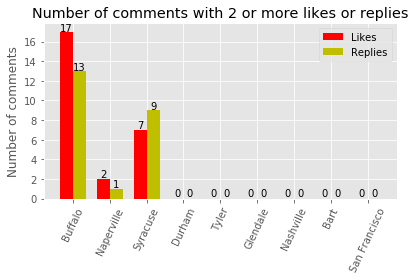

In [199]:
likes_replies_chart('Number of comments', ('Likes', 'Replies'), 'Number of comments with 2 or more likes or replies', likes_x, likes_y, replies_x, replies_y, all_madison_dfs, "likes_replies_analysis")

# 6) Authors' analysis

##### the following analysis was done after finding out details of the authors' on the internet (see authors_names.py)

In [43]:
authors_details_df = authors_details_dataframe(all_cities_dataframe)

In [44]:
authors_details_df.head(2)

,comment_id,author,Position,Company_name,Category_work,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name
1,E4-XFnl1uKc,Aaron Lee,Software Developer,Solace Systems,Private,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],Buffalo
2,E4-XFnjG3Ac,Aaron Lee,Software Developer,Solace Systems,Private,2017-01-25 04:25:20,0,public participation by providing regular oppo...,I would be interested to see this more finely ...,<p>I would be interested to see this more fine...,[],Buffalo


##### count just positions

In [40]:
count_positions = authors_details_df.drop_duplicates('author').reset_index()
count_just_positions = authors_details_analysis('Position', count_positions)
count_just_positions.head()

,index,Position,count
0,27,Unknown,27
1,21,Software Developer,7
2,3,Civic Technologist,4
3,19,Researcher,2
4,1,Assistant Professor,2


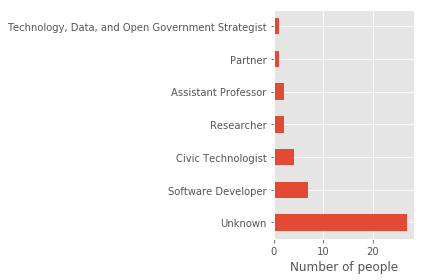

In [41]:
horizontal_bar_from_dataframe(count_just_positions.head(7), "Position", "count", "Number of people")

 ##### count just categories

In [42]:
count_just_categories = authors_details_analysis('Category_work', count_positions)
count_just_categories

,index,Category_work,count
0,6,Unknown,28
1,3,Private,13
2,1,Government,10
3,0,Academia (private),7
4,2,Not-for-profit,4
5,5,Public,2
6,4,Private/Cybersecurity,1


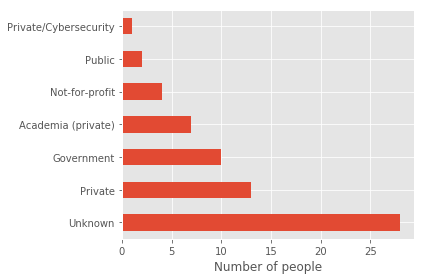

In [43]:
horizontal_bar_from_dataframe(count_just_categories, "Category_work", "count", "Number of people")

####  Position with city-wise analysis

In [44]:
count_positions1 = count_positions.groupby(['Position', 'city_name']).size().reset_index().rename(columns={0:'count'})

In [45]:
count_positions2 = count_positions1.sort_values(['city_name', 'count'], ascending=False)

In [46]:
# select only top two positions in each city
count_positions3 = count_positions2.groupby('city_name').head(2)

In [47]:
count_positions3

,Position,city_name,count
37,Unknown,Tyler,3
36,Unknown,Syracuse,5
25,Software Developer,Syracuse,2
10,Director for Open Participation and Communities,San Francisco,1
35,Unknown,San Francisco,1
24,Software Developer,Nashville,1
28,Statistician,Nashville,1
5,Civic Technologist,Naperville,3
3,Chief Data Officer,Naperville,1
32,Unknown,Glendale,7


In [48]:
position_list = count_positions3['Position'].tolist()
city_list = count_positions['city_name'].unique().tolist()

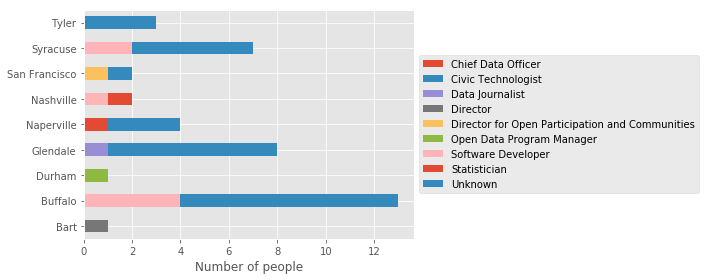

In [49]:
horizontal_stacked_bar_from_dataframe(count_positions3, "city_name", "Position", "count", "Number of people", "who-comments-the-most")

### are technical authors saying only technical things?

In [54]:
technical_positions = ['Software Developer', 'Data Scientist', 'Statistician', 'Chief Data Officer', 'Data Journalist']

In [63]:
for index, row in authors_details_df.iterrows():
    if row['Position'] in technical_positions:
        print('\033[1m' + "City:", row['city_name'])
        print('\033[0m' + "Position:", row['Position'])
        print('\033[1m' + "Comment text:", row['comment_text'])
        print()

City: Buffalo
Position: Software Developer
Comment text: I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.

City: Buffalo
Position: Software Developer
Comment text: I would be interested to see this more finely documented. It would be great to have a living, breathering process that community members could submit data sets that 

In [60]:
# eye-balling activity

technical_issues_by_tech_ppl_categories = ['Technical', 'Data Governance Committee', 'Utility']
technical_issues_by_tech_ppl_count = [9, 2, 2]

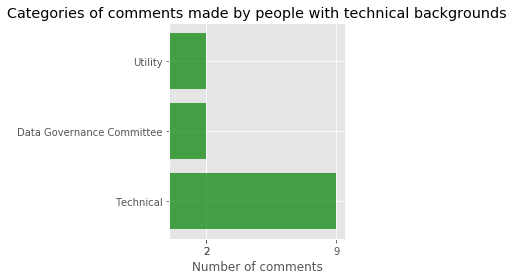

In [61]:
horizontal_bar(technical_issues_by_tech_ppl_categories, technical_issues_by_tech_ppl_count, "Number of comments", "Categories of comments made by people with technical backgrounds")

### what are researchers/academics saying?

In [62]:
'''
for index, row in authors_details_df.iterrows():
    if row['Category_work'] == "Private":
        print('\033[1m' + "City:", row['city_name'])
        print('\033[0m' + "Position:", row['Position'])
        print('\033[0m' + "Company name:", row['Company_name'])
        print('\033[1m' + "Comment text:", row['comment_text'])
        print()
'''

'\nfor index, row in authors_details_df.iterrows():\n    if row[\'Category_work\'] == "Private":\n        print(\'\x1b\' + "City:", row[\'city_name\'])\n        print(\'\x1b\' + "Position:", row[\'Position\'])\n        print(\'\x1b\' + "Company name:", row[\'Company_name\'])\n        print(\'\x1b\' + "Comment text:", row[\'comment_text\'])\n        print()\n'

# 7) Support vs. Rejection Count

In [18]:
support, rejection, cities = support_n_rejection_analysis(all_madison_dfs)

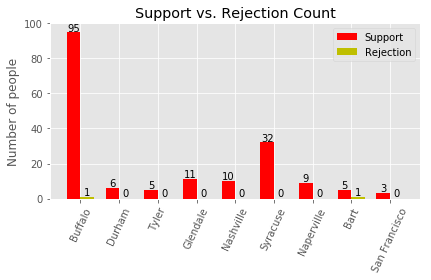

In [19]:
likes_replies_chart('Number of people', ('Support', 'Rejection'), 'Support vs. Rejection Count', cities, support, cities, rejection, all_madison_dfs, None)